## Exercise 1A - Univariate Linear Regression

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
def generate_dataset():
    x = np.random.uniform(0,1,size=(1000))
    l = np.random.normal(0,50,1000)
    y = 0.5 * x + 2 + l
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)
    return x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test = generate_dataset()

In [ ]:
lr = 0.001
epochs = 100

cost_tensorflow = False

X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(tf.zeros([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_mean(tf.pow(pred-Y, 2))
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    print("Training...\n")
    sess.run(init)
    for epoch in range(epochs):
        sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
        if (epoch+1) % 10 == 0:
            if cost_tensorflow == True:
                c = sess.run(cost, feed_dict={X: x_train, Y:y_train})
                print("Epoch:", (epoch+1), "cost=", round(c,4), \
                    "W=", round(sess.run(W)[0],4), "b=", round(sess.run(b)[0],4))
            else:
                ypred_train = sess.run(pred,feed_dict={X: x_train, Y:y_train})
                print("Epoch:", (epoch+1), "cost=", 
                      round(np.mean((ypred_train - y_train)**2),4), \
                    "W=", round(sess.run(W)[0],4), "b=", round(sess.run(b)[0],4))
    print("\nTraining Completed!")
    if cost_tensorflow == True:
        training_cost = sess.run(cost, feed_dict={X: x_train, Y: y_train})
        print("Training cost=", np.round(training_cost,4), 
              "W=", np.round(sess.run(W),4), "b=", np.round(sess.run(b),4), '\n')
        print("Error (RMSE)=", np.sqrt( training_cost))
    else:
        ypred_train = sess.run(pred, feed_dict={X: x_train, Y: y_train})
        print("\nTraining cost =", np.mean((y_train - ypred_train) ** 2))
        print("Error (RMSE)=", np.sqrt(np.mean((y_train - ypred_train) ** 2)))
        

    
    print("\nTesting...")
    if cost_tensorflow == True:
        testing_cost = sess.run(
            tf.reduce_mean(tf.pow(pred - Y, 2)), feed_dict={X: x_test, Y: y_test})  
        print("Testing cost=", testing_cost)
        print("Error (RMSE)=", np.sqrt( testing_cost))

    else:
        ypred_test = sess.run(pred, feed_dict={X: x_test, Y: y_test}) 
        print("Testing cost=", np.mean((y_test - ypred_test) ** 2))
        print("Error (RMSE)=", np.sqrt(np.mean((y_test - ypred_test) ** 2)))
        
    fig, ax = plt.subplots(1,2,figsize=(15, 5))
    ax[0].plot(x_train, y_train, '.', label='Train data')
    ax[0].plot(x_train, sess.run(W) * x_train + sess.run(b),'r', label='Fitted line')
    ax[0].set_xlabel("X_Train")
    ax[0].set_ylabel("YPred_Train")
    ax[0].legend()
    ax[1].plot(x_test, y_test, '.', label='Test data')
    ax[1].plot(x_test, sess.run(W) * x_test + sess.run(b),'g', label='Fitted line')
    ax[1].set_xlabel("X_Test")
    ax[1].set_ylabel("YPred_Test")
    ax[1].legend()


## Exercise 1B - Multivariate Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("auto-mpg.data",header=None,delim_whitespace=True)
data[3] = data[3].convert_objects(convert_numeric=True)
data = data.drop(columns = 8)
data = data.fillna(data.mean())
data = pd.get_dummies(data)
data = data.sample(frac=1)
y = np.array(data[0])
x = np.array(data.drop(columns=0))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
# x = preprocessing.normalize(x)

# y = preprocessing.normalize(y)

In [ ]:
learningrate = [1e-7,1e-8,1e-9]
epochs = 100
RMSE_all,MSE_all,MAE_all = [],[],[]
for lr in learningrate:
    MAE,MSE,RMSE,ep = [],[],[],[]
    cost_tensorflow = False

    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    W = tf.Variable(tf.zeros([1,x_train.shape[1]]), dtype= tf.float32, name = 'weight')
    b = tf.Variable(0, dtype = tf.float32, name="bias")
    # Construct a linear model
    pred = tf.tensordot(X, tf.transpose(W),1) + b

    MAerror = tf.reduce_mean(tf.abs(pred - Y))
    MSerror = tf.reduce_mean(tf.square(pred - Y))
    RMSerror = tf.sqrt(tf.reduce_mean(tf.square(pred - Y)))

    cost = tf.reduce_mean(tf.square(pred-Y))
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        print("Training...\n")
        sess.run(init)
        for epoch in range(epochs):
            sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
            if (epoch+1) % 10 == 0:
                ep.append(epoch+1)
                MAE.append(sess.run(MAerror,feed_dict={X: x_train, Y:y_train}))
                MSE.append(sess.run(MSerror,feed_dict={X: x_train, Y:y_train}))
                RMSE.append(sess.run(RMSerror,feed_dict={X: x_train, Y:y_train}))
                print("Epoch:", (epoch+1), "cost=", MSE[-1])
        print("\nTraining Completed!")
        ypred_test = sess.run(pred, feed_dict={X: x_test, Y: y_test})
        ypred_train = sess.run(pred, feed_dict={X: x_train, Y: y_train})
        print("\nTraining cost =", MSE[-1])
        print("Error (RMSE)=", RMSE[-1])
        print(sess.run(W))
        RMSE_all.append(RMSE)
        MSE_all.append(MSE)
        print(ypred_train[10])
        MAE_all.append(MAE)
        fig, ax = plt.subplots(1,3,figsize=(15, 3))
        ax[0].plot(ep,MAE,'g',label = "MAE")
        ax[0].set_xlabel("Epochs")
        ax[0].set_ylabel("MAE")
        ax[1].plot(MSE,'b',label = "MSE")
        ax[1].set_xlabel("Epochs")
        ax[1].set_ylabel("MSE")
        ax[2].plot(RMSE,'r',label = "RMSE")
        ax[2].set_xlabel("Epochs")
        ax[2].set_ylabel("RMSE")
        ax[0].legend()
        ax[1].legend()
        ax[2].legend()
        plt.show()
        fig, ax = plt.subplots(1,2,figsize=(15, 5))
        ax[0].scatter(ypred_train,y_train)
        ax[0].set_xlabel("Ground Truth - Train")
        ax[0].set_ylabel("Prediction")
        ax[1].scatter(ypred_test,y_test)
        ax[1].set_xlabel("Ground Truth - Test")
        ax[1].set_ylabel("Prediction")
        plt.show()
        
for i in range(3):
    plt.plot(ep,RMSE_all[i],label = str(learningrate[i]))
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()
for i in range(3):
    plt.plot(ep,MSE_all[i],label = str(learningrate[i]))
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
for i in range(3):
    plt.plot(ep,MAE_all[i],label = str(learningrate[i]))
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()    


## Logistic Regression on Olivetti faces dataset

### Gradient Descent Optimiser 

In [153]:
import tensorflow as tf
from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
faces = fetch_olivetti_faces(shuffle = True)

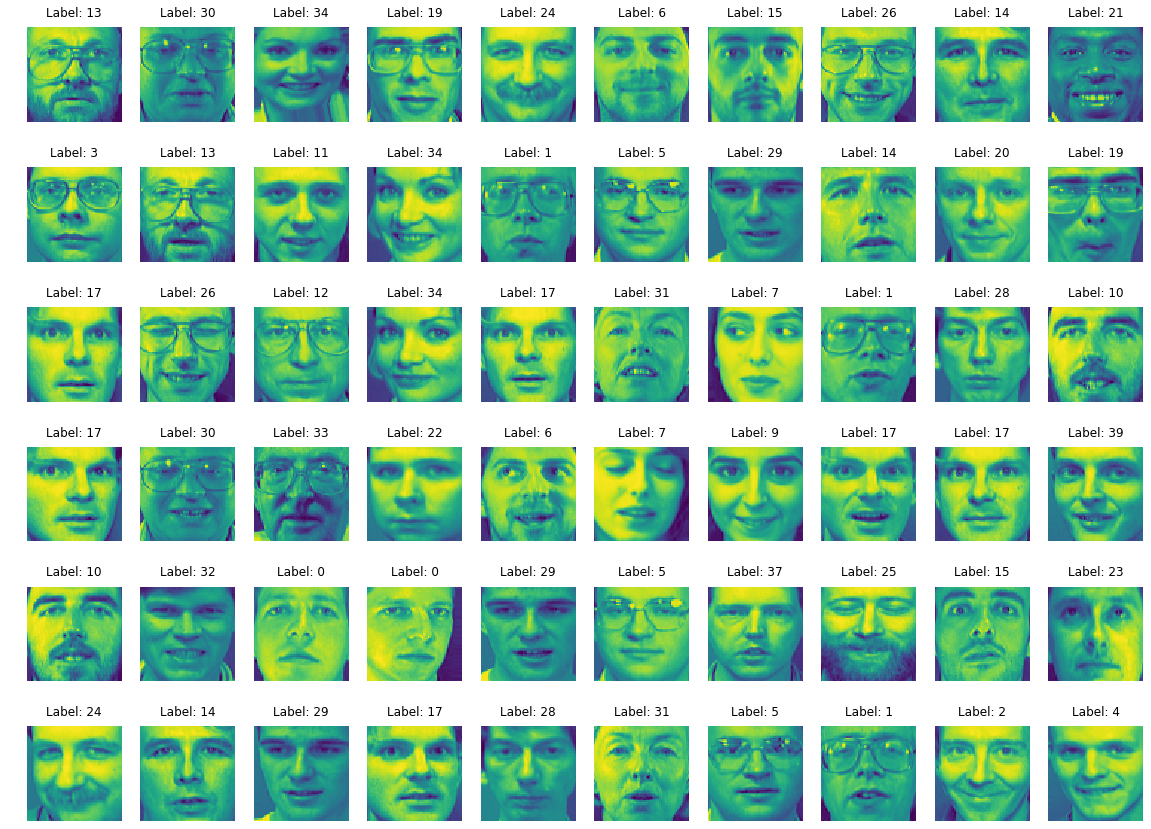

In [136]:
fig, ax = plt.subplots(6,10,figsize=(20,15))
c = 0
for i in range(6):
    for j in range(10):
        ax[i][j].matshow(faces.images[c])
        ax[i][j].axis("off")
        ax[i][j].set_title("Label: " + str(faces.target[c]))
        c+=1
plt.show()

In [154]:
Y = np.zeros((400,40))
for pos,i in enumerate(faces.target):
    Y[pos][i] = 1

In [155]:
def accuracy(predictions, labels): 
    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
    accu = (100.0 * correctly_predicted) / predictions.shape[0] 
    return accu 

In [156]:
train_im, test_im, train_imy, test_imy = train_test_split(faces.images, Y, test_size=0.1,shuffle = False)

In [157]:
X = faces.data
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.1,shuffle = False)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(360, 4096) (40, 4096) (360, 40) (40, 40)


In [184]:
learningrate = [0.1,1e-3,1e-5]
lp,at,ate = [],[],[]
for lr in learningrate:
    W = tf.Variable(tf.random_normal(shape=[4096, 40]),name = "W")
    b = tf.Variable(tf.zeros([40]),name = "b")

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Define placeholders
    data = tf.placeholder("float", name = "data")
    target = tf.placeholder("float",name = "target")

    # Declare the model you need to learn    
    logits = tf.matmul(data, W) + b 

    # cross-entropy loss function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=logits))

    # Define the optimizer
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

    # Predictions
    prediction = tf.nn.softmax(logits) 

    # In[3]:

    init = tf.global_variables_initializer()
    iter_num = 50
    loss_plot, accuracy_train, accuracy_test = [],[],[]
    # Start training
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        # Training cycle
        for epoch in range(iter_num):
            total_batch = 100
            batch_x_train = np.array_split(train_X,total_batch)
            batch_y_train = np.array_split(train_y,total_batch)
            # Loop over all batches
            for x_batch,y_batch in zip(batch_x_train,batch_y_train):
                 # Prepare the feed dict 
                feed_dict = {data : x_batch,target : y_batch}
        # run one step of computation 
                opt, lo, predictions = sess.run([optimizer, loss, prediction],feed_dict=feed_dict)
            loss_plot.append(lo)
            feed_dict = {data : train_X,target : train_y}
            predictions = sess.run(prediction,feed_dict=feed_dict)
            accuracy_train.append(accuracy(predictions, train_y))
            feed_dict = {data : test_X,target : test_y}
            predictions = sess.run(prediction,feed_dict=feed_dict)
            accuracy_test.append(accuracy(predictions, test_y))
    lp.append(loss_plot)
    at.append(accuracy_train)
    ate.append(accuracy_test)

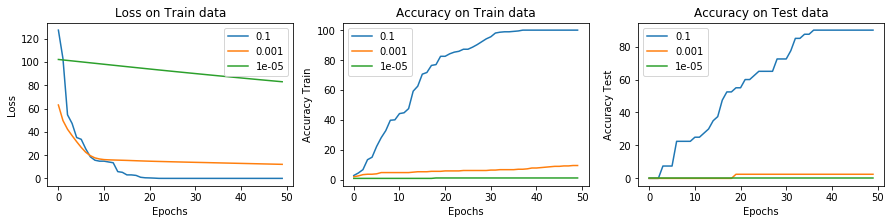

In [188]:
fig, ax = plt.subplots(1,3,figsize=(15, 3))
for c in range(3):
    ax[0].plot(np.sort(lp[c])[::-1],label = str(learningrate[c]))
    ax[1].plot(np.sort(at[c]),label = str(learningrate[c]))
    ax[2].plot(np.sort(ate[c]),label = str(learningrate[c]))
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy Train")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy Test")
ax[0].set_title("Loss on Train data")
ax[1].set_title("Accuracy on Train data")
ax[2].set_title("Accuracy on Test data")
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

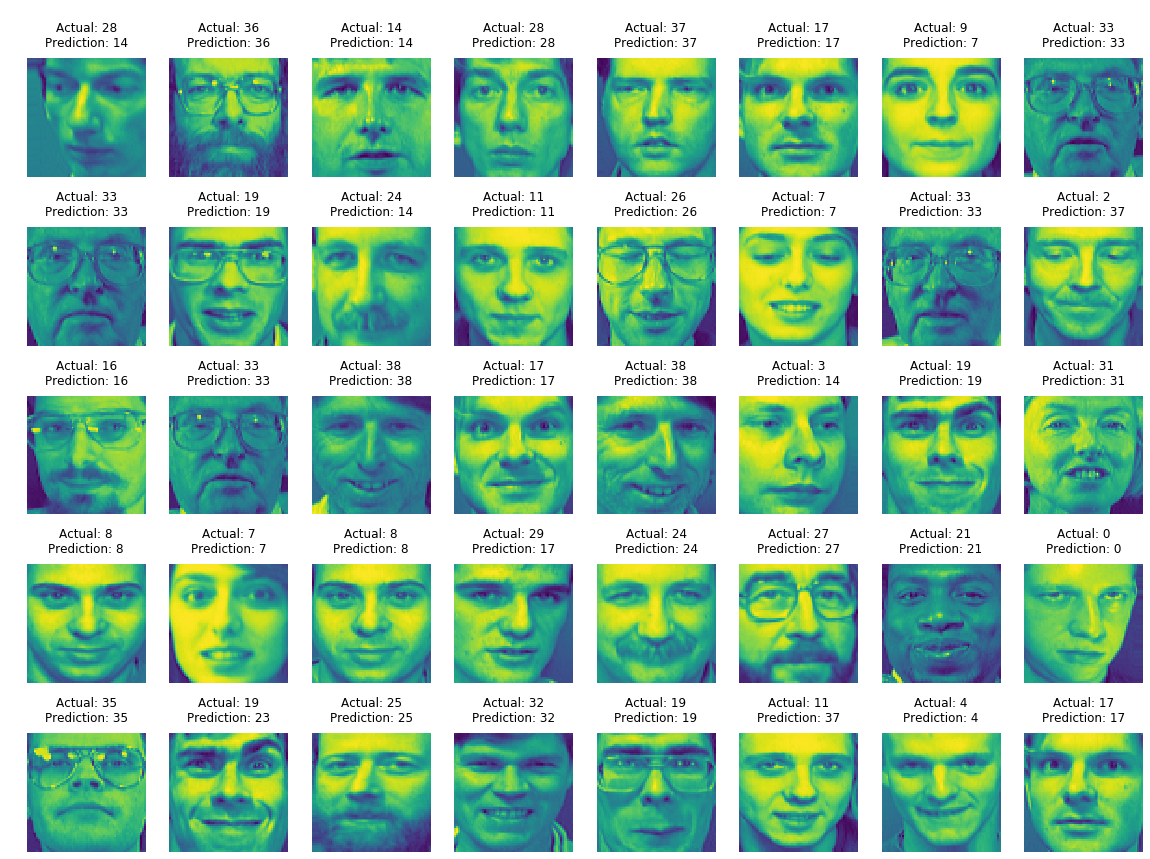

In [142]:
fig, ax = plt.subplots(5,8,figsize=(20,15))
plt.title("Predictions on Test Set")
c = 0
for i in range(5):
    for j in range(8):
        ax[i][j].matshow(test_im[c])
        ax[i][j].axis("off")
        pred = np.where(predictions[c] > 0.5, 1, 0)
        ax[i][j].set_title("\nActual: "+ str(np.argwhere(test_y[c] == 1)[0][0]) + "\nPrediction: " + str(np.argwhere(pred == 1)[0][0]))
        c+=1
plt.show()

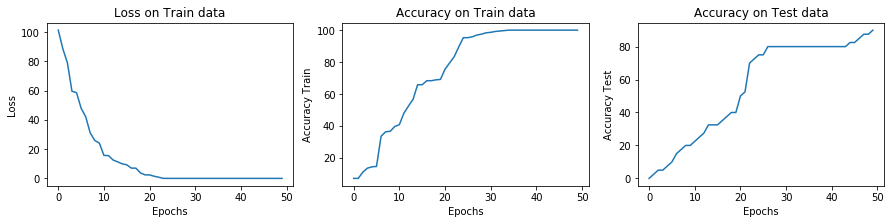

In [143]:
fig, ax = plt.subplots(1,3,figsize=(15, 3))
ax[0].plot(np.sort(loss_plot)[::-1])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(np.sort(accuracy_train))
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy Train")
ax[2].plot(np.sort(accuracy_test))
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy Test")
ax[0].set_title("Loss on Train data")
ax[1].set_title("Accuracy on Train data")
ax[2].set_title("Accuracy on Test data")
plt.show()

### RMSProp Optimiser

In [190]:
learningrate = [0.1,1e-3,1e-5]
lp,at,ate = [],[],[]
for lr in learningrate:
    W = tf.Variable(tf.random_normal(shape=[4096, 40]),name = "W")
    b = tf.Variable(tf.zeros([40]),name = "b")

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Define placeholders
    data = tf.placeholder("float", name = "data")
    target = tf.placeholder("float",name = "target")

    # Declare the model you need to learn    
    logits = tf.matmul(data, W) + b 

    # cross-entropy loss function
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=logits))

    # Define the optimizer
    optimizer = tf.train.RMSPropOptimizer(lr,momentum=0.9).minimize(loss)

    # Predictions for the training, validation, and test data. 
    prediction = tf.nn.softmax(logits) 

    # In[3]:

    init = tf.global_variables_initializer()
    iter_num = 500

    loss_plot, accuracy_train, accuracy_test = [],[],[]
    # Start training
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)
        # Training cycle
        for epoch in range(iter_num):
            total_batch = 100
            batch_x_train = np.array_split(train_X,total_batch)
            batch_y_train = np.array_split(train_y,total_batch)
            # Loop over all batches
            for x_batch,y_batch in zip(batch_x_train,batch_y_train):
                 # Prepare the feed dict 
                feed_dict = {data : x_batch,target : y_batch}
        # run one step of computation 
                opt, lo, predictions = sess.run([optimizer, loss, prediction],feed_dict=feed_dict)
            loss_plot.append(lo)
            feed_dict = {data : train_X,target : train_y}
            predictions = sess.run(prediction,feed_dict=feed_dict)
            accuracy_train.append(accuracy(predictions, train_y))
            feed_dict = {data : test_X,target : test_y}
            predictions = sess.run(prediction,feed_dict=feed_dict)
            accuracy_test.append(accuracy(predictions, test_y))
            if accuracy_train[-1] == 100:
                print("Converged in "+ str(epoch)+"...epochs")
                print("Test Accuracy: ", accuracy_test[-1])
                break
    lp.append(loss_plot)
    at.append(accuracy_train)
    ate.append(accuracy_test)

Converged in 136...epochs
Test Accuracy:  77.5
Converged in 127...epochs
Test Accuracy:  87.5


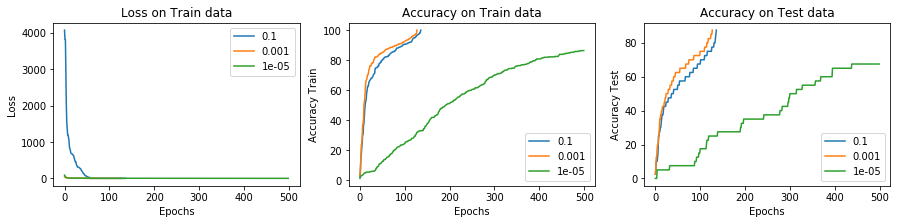

In [191]:
fig, ax = plt.subplots(1,3,figsize=(15, 3))
for c in range(3):
    ax[0].plot(np.sort(lp[c])[::-1],label = str(learningrate[c]))
    ax[1].plot(np.sort(at[c]),label = str(learningrate[c]))
    ax[2].plot(np.sort(ate[c]),label = str(learningrate[c]))
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy Train")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy Test")
ax[0].set_title("Loss on Train data")
ax[1].set_title("Accuracy on Train data")
ax[2].set_title("Accuracy on Test data")
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

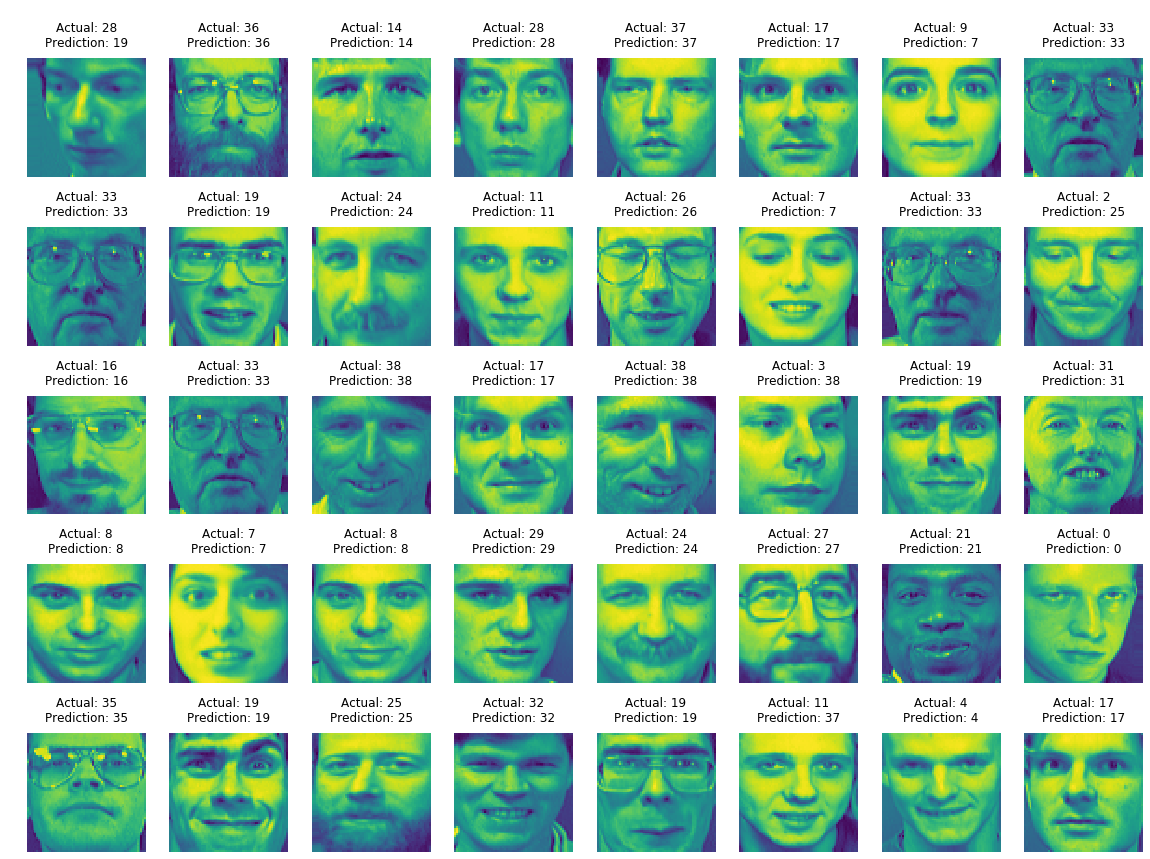

In [151]:
fig, ax = plt.subplots(5,8,figsize=(20,15))
plt.title("Predictions on Test Set")
c = 0
for i in range(5):
    for j in range(8):
        ax[i][j].matshow(test_im[c])
        ax[i][j].axis("off")
        pred = np.where(predictions[c] > 0.5, 1, 0)
        ax[i][j].set_title("\nActual: "+ str(np.argwhere(test_y[c] == 1)[0][0]) + "\nPrediction: " + str(np.argwhere(pred == 1)[0][0]))
        c+=1
plt.show()

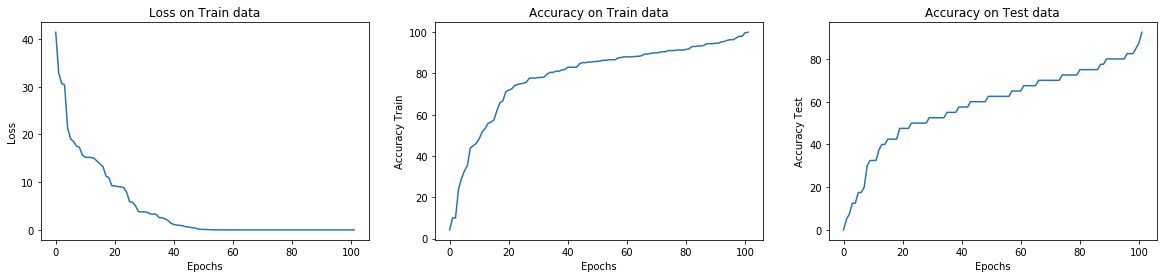

In [152]:
fig, ax = plt.subplots(1,3,figsize=(20, 4))
ax[0].plot(np.sort(loss_plot)[::-1])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(np.sort(accuracy_train))
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy Train")
ax[2].plot(np.sort(accuracy_test))
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy Test")
ax[0].set_title("Loss on Train data")
ax[1].set_title("Accuracy on Train data")
ax[2].set_title("Accuracy on Test data")
plt.show()

### Adam Optimizer

In [146]:
W = tf.Variable(tf.random_normal(shape=[4096, 40]),name = "W")
b = tf.Variable(tf.zeros([40]),name = "b")
    
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Define placeholders
data = tf.placeholder("float", name = "data")
target = tf.placeholder("float",name = "target")
    
# Declare the model you need to learn    
logits = tf.matmul(data, W) + b 

# cross-entropy loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=logits))
lr = 1e-3

# Define the optimizer
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

# Predictions
prediction = tf.nn.softmax(logits) 

# In[3]:

init = tf.global_variables_initializer()
iter_num = 500

loss_plot, accuracy_train, accuracy_test = [],[],[]
# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    # Training cycle
    for epoch in range(iter_num):
        total_batch = 100
        batch_x_train = np.array_split(train_X,total_batch)
        batch_y_train = np.array_split(train_y,total_batch)
        # Loop over all batches
        for x_batch,y_batch in zip(batch_x_train,batch_y_train):
             # Prepare the feed dict 
            feed_dict = {data : x_batch,target : y_batch}
    # run one step of computation 
            opt, lo, predictions = sess.run([optimizer, loss, prediction],feed_dict=feed_dict)
        loss_plot.append(lo)
        feed_dict = {data : train_X,target : train_y}
        predictions = sess.run(prediction,feed_dict=feed_dict)
        accuracy_train.append(accuracy(predictions, train_y))
        feed_dict = {data : test_X,target : test_y}
        predictions = sess.run(prediction,feed_dict=feed_dict)
        accuracy_test.append(accuracy(predictions, test_y))
        if accuracy_train[-1] == 100:
            print("Converged in "+str(epoch)+"...epochs")
            print("Test Accuracy: ", accuracy_test[-1])
            break

Converged in 92...epochs
Test Accuracy:  67.5


In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15, 3))
for c in range(3):
    ax[0].plot(np.sort(lp[c])[::-1],label = str(learningrate[c]))
    ax[1].plot(np.sort(at[c]),label = str(learningrate[c]))
    ax[2].plot(np.sort(ate[c]),label = str(learningrate[c]))
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy Train")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy Test")
ax[0].set_title("Loss on Train data")
ax[1].set_title("Accuracy on Train data")
ax[2].set_title("Accuracy on Test data")
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(5,8,figsize=(20,15))
plt.title("Predictions on Test Set")
c = 0
for i in range(5):
    for j in range(8):
        ax[i][j].matshow(test_im[c])
        ax[i][j].axis("off")
        pred = np.where(predictions[c] > 0.5, 1, 0)
        ax[i][j].set_title("\nActual: "+ str(np.argwhere(test_y[c] == 1)[0][0]) + "\nPrediction: " + str(np.argwhere(pred == 1)[0][0]))
        c+=1
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20, 4))
ax[0].plot(np.sort(loss_plot)[::-1])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(np.sort(accuracy_train))
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy Train")
ax[2].plot(np.sort(accuracy_test))
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracy Test")
ax[0].set_title("Loss on Train data")
ax[1].set_title("Accuracy on Train data")
ax[2].set_title("Accuracy on Test data")
plt.show()